Aim of the project: Buying House 
Client: Erin Robinson

Request: "Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible"

Data Table created in DBeaver with the following command:

SELECT
	t2.price,
	t1.*,
	t2.date
FROM
	king_county_house_details t1
LEFT JOIN king_county_house_sales t2
ON
	t1.id = t2.house_id

Next Step is to analyze the .csv results, cleaning and determinate the correlations

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd


df_houses=pd.read_csv("./data/DATA_EDA_project.csv")
df_houses

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,...,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13
1,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09
2,180000.0,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25
3,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09
4,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21
21593,400000.0,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23
21594,402101.0,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23
21595,400000.0,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,...,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16


In [3]:
df_houses['zipcode'].nunique()

70

In [4]:
df_houses.info() # to get information regarding the type of data in each column. date should be changed in date format in order to be analyzed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   id             21597 non-null  int64  
 2   bedrooms       21597 non-null  float64
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  float64
 5   sqft_lot       21597 non-null  float64
 6   floors         21597 non-null  float64
 7   waterfront     19206 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  float64
 12  sqft_basement  21145 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17749 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
# change date in the dedicated format type
df_houses['date']=pd.to_datetime(df_houses['date'], format='%Y-%m-%d')

In [6]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          21597 non-null  float64       
 1   id             21597 non-null  int64         
 2   bedrooms       21597 non-null  float64       
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  float64       
 5   sqft_lot       21597 non-null  float64       
 6   floors         21597 non-null  float64       
 7   waterfront     19206 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  float64       
 12  sqft_basement  21145 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17749 non-null  float64       
 15  zipcode        2159

In [7]:
#check the df description
df_houses.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,...,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597
mean,5.402966e+05,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,...,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,2014-10-29 04:20:38.171968512
min,7.800000e+04,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014-05-02 00:00:00
25%,3.220000e+05,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014-07-22 00:00:00
50%,4.500000e+05,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014-10-16 00:00:00
75%,6.450000e+05,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015-02-17 00:00:00
max,7.700000e+06,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015-05-27 00:00:00
std,3.673681e+05,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,...,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,NaN


Date string as been converted in date forma. Now we should check for data consistency in the column (as described in column_names) and missing files

In [8]:
#Check for empty cells in which column
df_houses.isna().sum()

price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
dtype: int64

Checking the quantities of missing information

<Axes: >

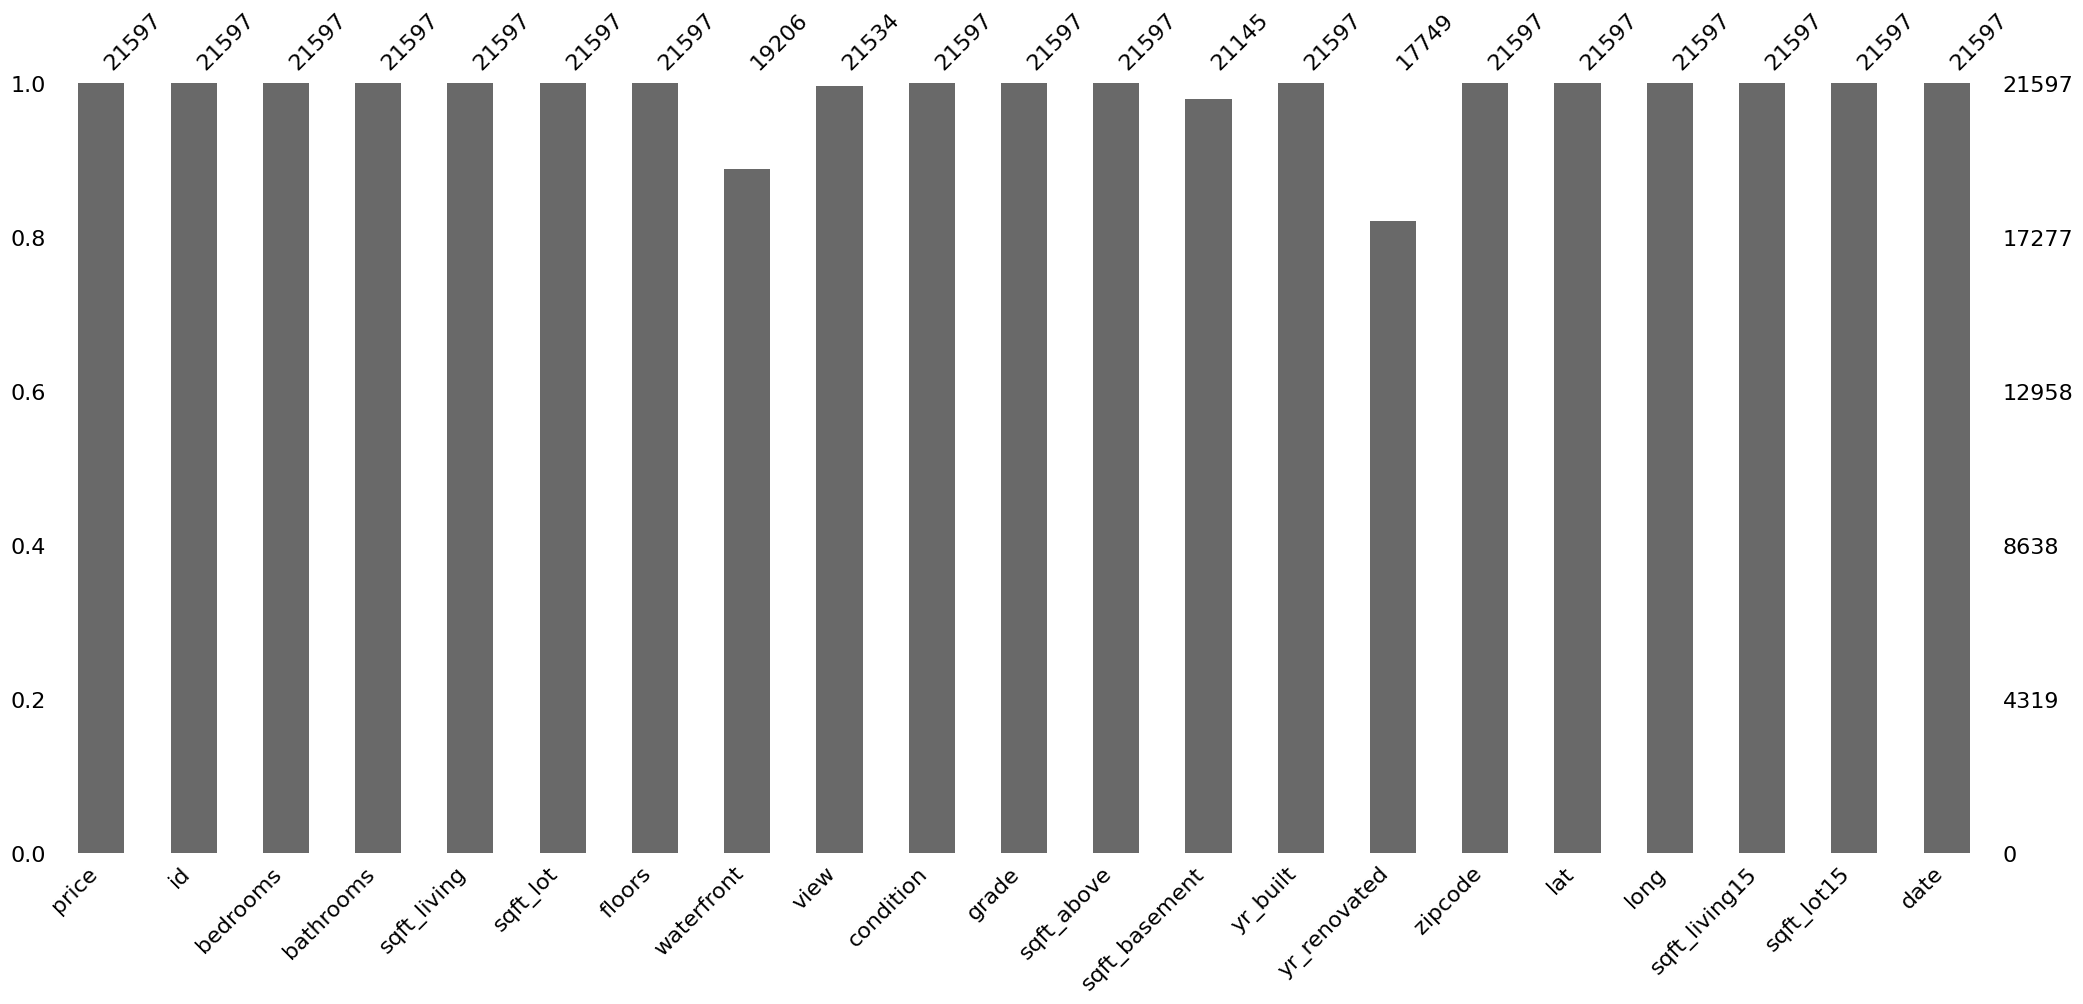

In [9]:
# plotting percentage of missing values per column
msno.bar(df_houses)

Around 20 percent of the year of renovation is missing, this values should be better understood to check the presence of false or error

<Axes: xlabel='zipcode', ylabel='yr_renovated'>

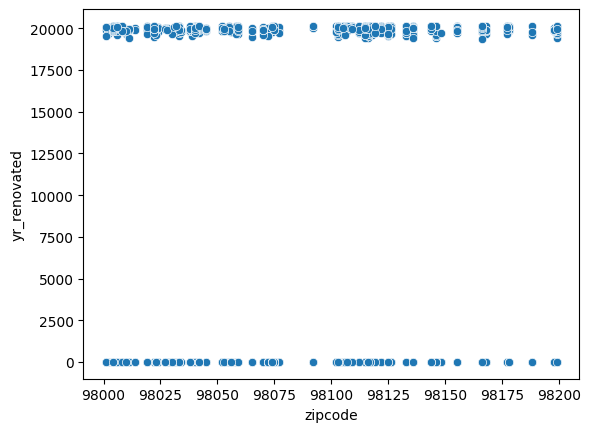

In [10]:
sns.scatterplot(df_houses, x='zipcode', y='yr_renovated')

We observed that the houses that weren't renovated shows a 0 while, the one renovated are 10 times bigger than what should be.


<Axes: xlabel='zipcode', ylabel='yr_renovated'>

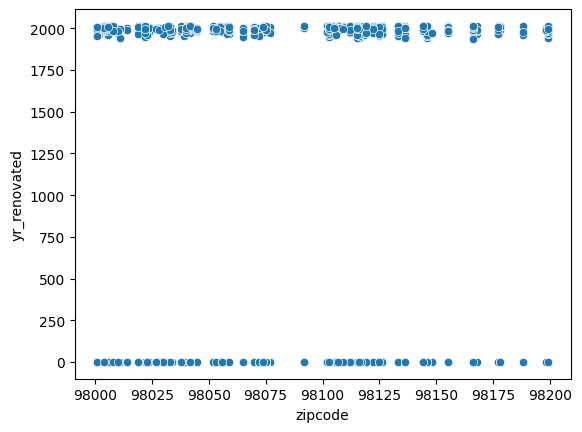

In [11]:
#Divide by 10 the yr_renovated
df_houses['yr_renovated']=df_houses['yr_renovated']/10
sns.scatterplot(df_houses, x='zipcode', y='yr_renovated')

In [12]:
df_houses.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,...,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597
mean,5.402966e+05,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,...,1788.596842,291.857224,1970.999676,83.665052,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,2014-10-29 04:20:38.171968512
min,7.800000e+04,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014-05-02 00:00:00
25%,3.220000e+05,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014-07-22 00:00:00
50%,4.500000e+05,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014-10-16 00:00:00
75%,6.450000e+05,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015-02-17 00:00:00
max,7.700000e+06,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015-05-27 00:00:00
std,3.673681e+05,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,...,827.759761,442.490863,29.375234,400.011055,53.513072,0.138552,0.140724,685.230472,27274.441950,NaN


In [13]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          21597 non-null  float64       
 1   id             21597 non-null  int64         
 2   bedrooms       21597 non-null  float64       
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  float64       
 5   sqft_lot       21597 non-null  float64       
 6   floors         21597 non-null  float64       
 7   waterfront     19206 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  float64       
 12  sqft_basement  21145 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17749 non-null  float64       
 15  zipcode        2159

The description and the info shows that are present some floating values. There should be only INT64 values

In [14]:
#Convert the float values to int64
df_houses['yr_renovated'] = df_houses['yr_renovated'].round().astype('Int64')
df_houses

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,...,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13
1,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09
2,180000.0,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,770.0,0.0,1933,<NA>,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25
3,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09
4,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21
21593,400000.0,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,2310.0,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23
21594,402101.0,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,1020.0,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23
21595,400000.0,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,...,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16


Checking if there are NaN values

In [15]:
df_houses.isna().sum()

price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
dtype: int64

<Axes: >

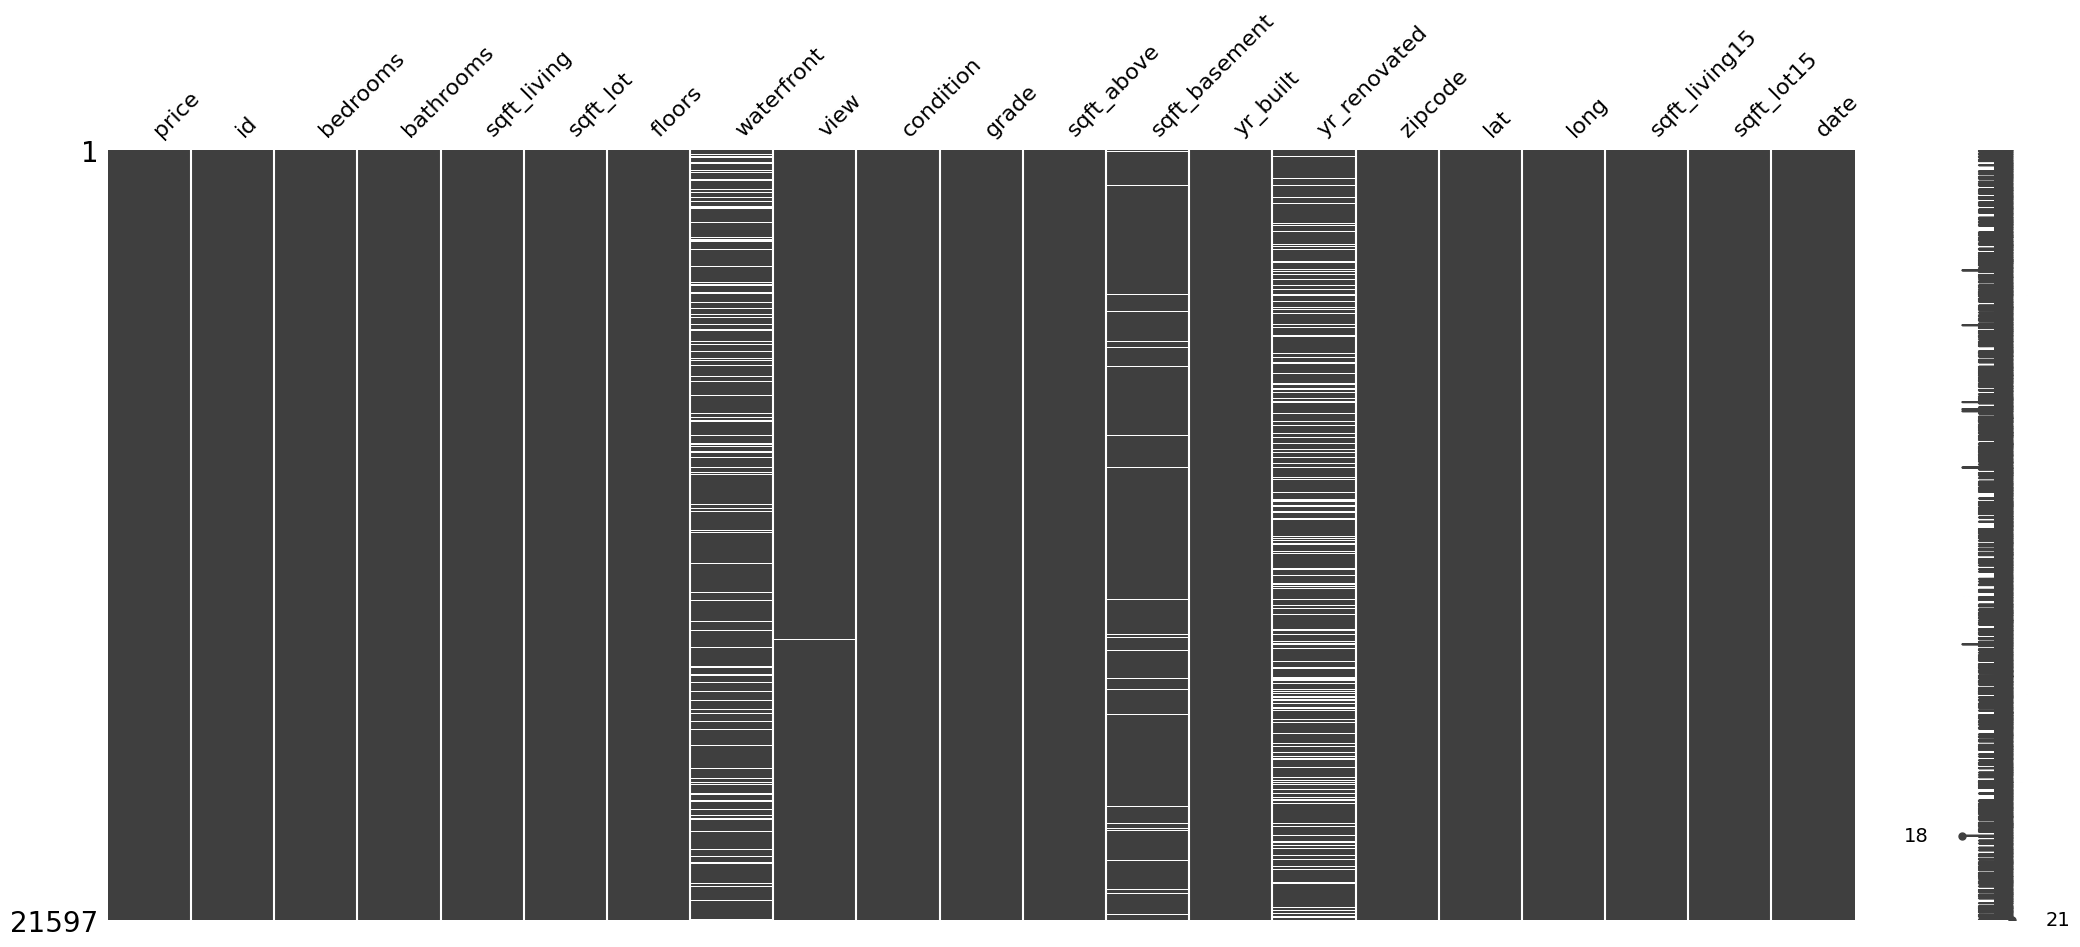

In [16]:
msno.matrix(df_houses)

the sqft_basement can be also an information that the client may be interested about. In this situation some data are missing, but can be traced back from other column.
by defining a new data frame

In [17]:
df_houses['sqft_basement'].nunique()

303

In [18]:
# check for NaN values and substitue with the correct value
df_houses['sqft_basement'] = df_houses.apply(
    lambda row: row['sqft_basement'] if pd.notna(row['sqft_basement']) else row['sqft_living'] - row['sqft_above'],
    axis=1
)
df_houses


,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,...,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13
1,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09
2,180000.0,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,770.0,0.0,1933,<NA>,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25
3,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09
4,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21
21593,400000.0,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,2310.0,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23
21594,402101.0,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,1020.0,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23
21595,400000.0,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,...,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16


Before deleted the missing values, it is important to consider only the column necessary for this analysis. The waterfront column shows 0 if the house doesn't have a view of a waterfront and NaN in case it does. So NaN should be turned in 1, or both 0 and NaN should be defined in a category. Let' turn NaN in 1

<Axes: >

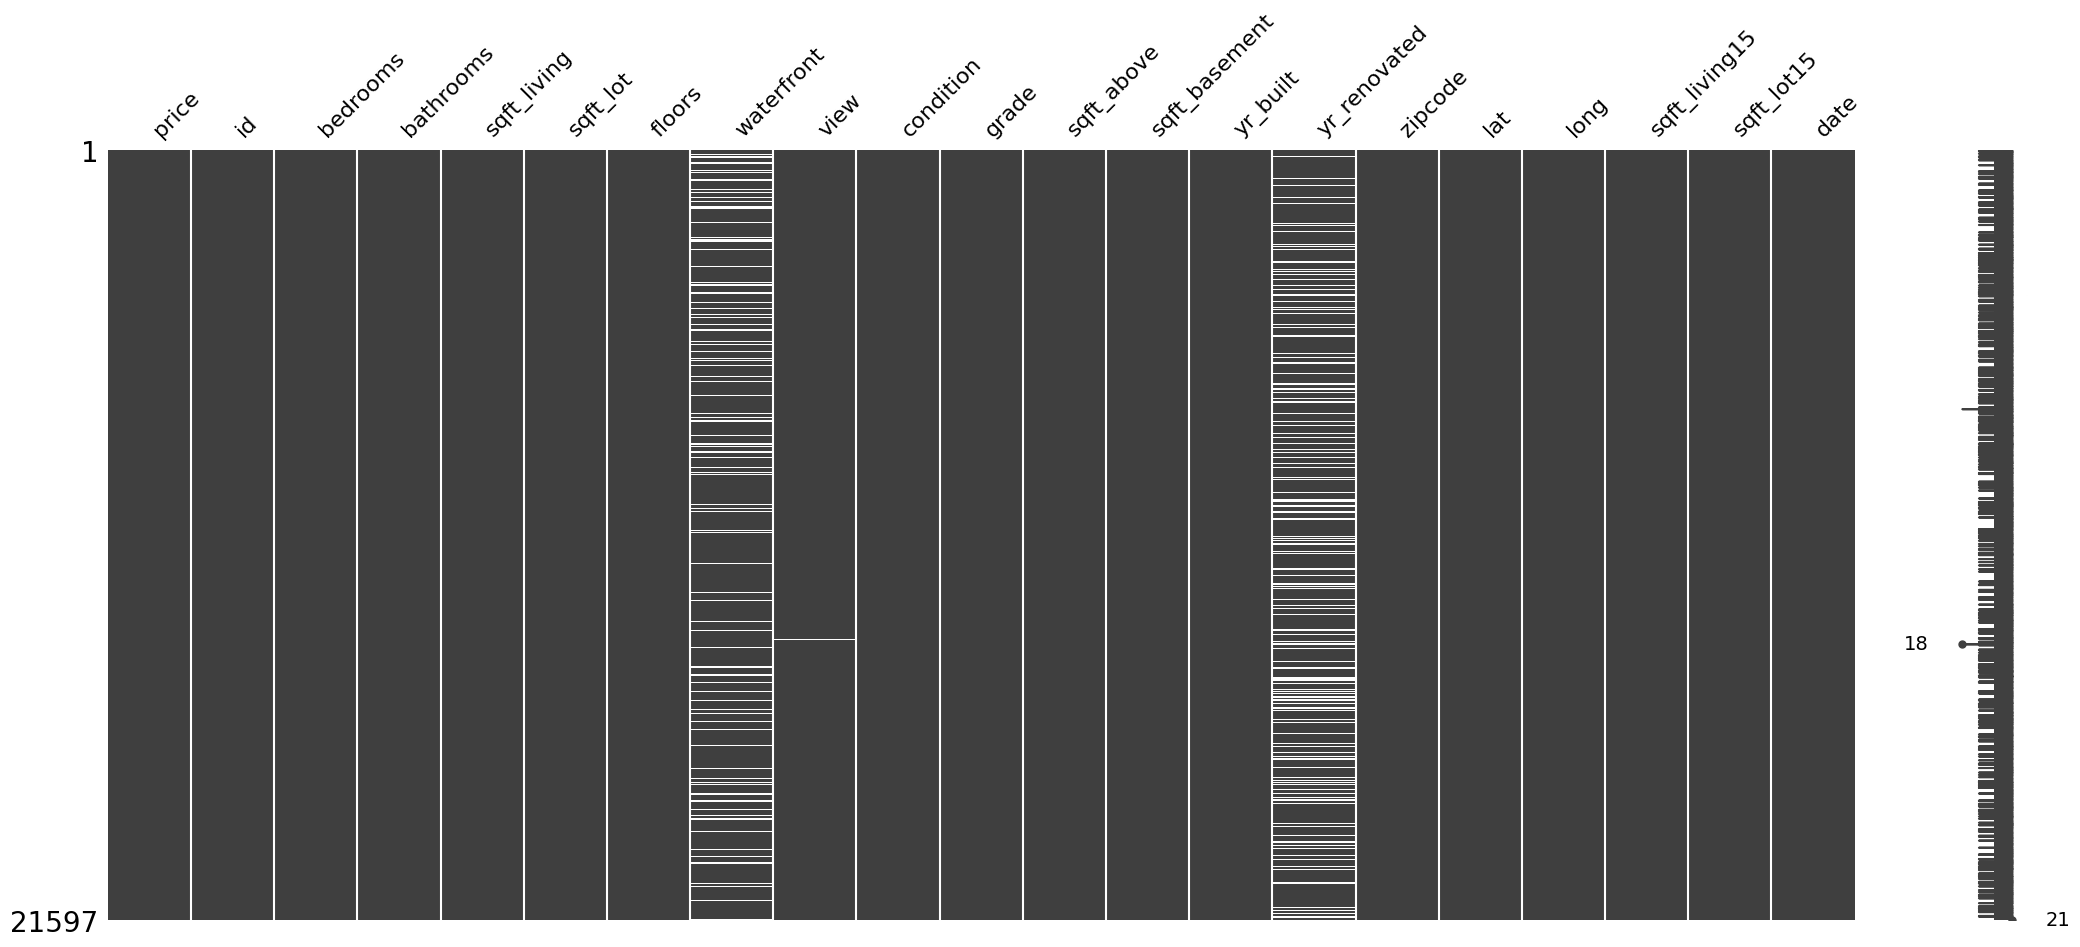

In [19]:
msno.matrix(df_houses)

<Axes: xlabel='id', ylabel='sqft_basement'>

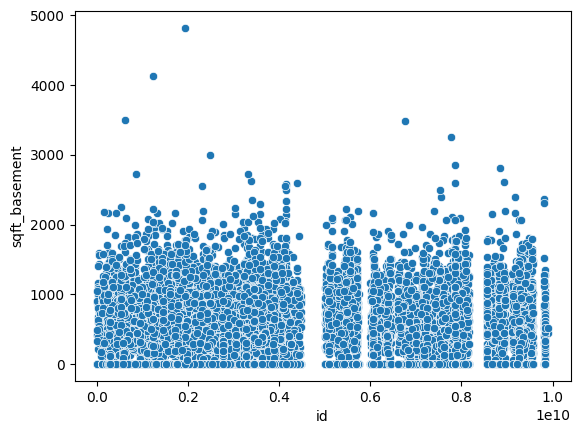

In [ ]:
sns.histplot(df_houses,x='id', y='sqft_basement')

In [21]:
# Replacing the watherfront column values as 0 and 1
df_houses['waterfront'] = df_houses['waterfront'].fillna(1)
df_houses['waterfront'] = df_houses['waterfront'].round().astype('Int64')
#df_houses = df_houses.drop('(False, waterfront)', axis=1)

df_houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          21597 non-null  float64       
 1   id             21597 non-null  int64         
 2   bedrooms       21597 non-null  float64       
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  float64       
 5   sqft_lot       21597 non-null  float64       
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  Int64         
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  float64       
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17749 non-null  Int64         
 15  zipcode        2159

<Axes: >

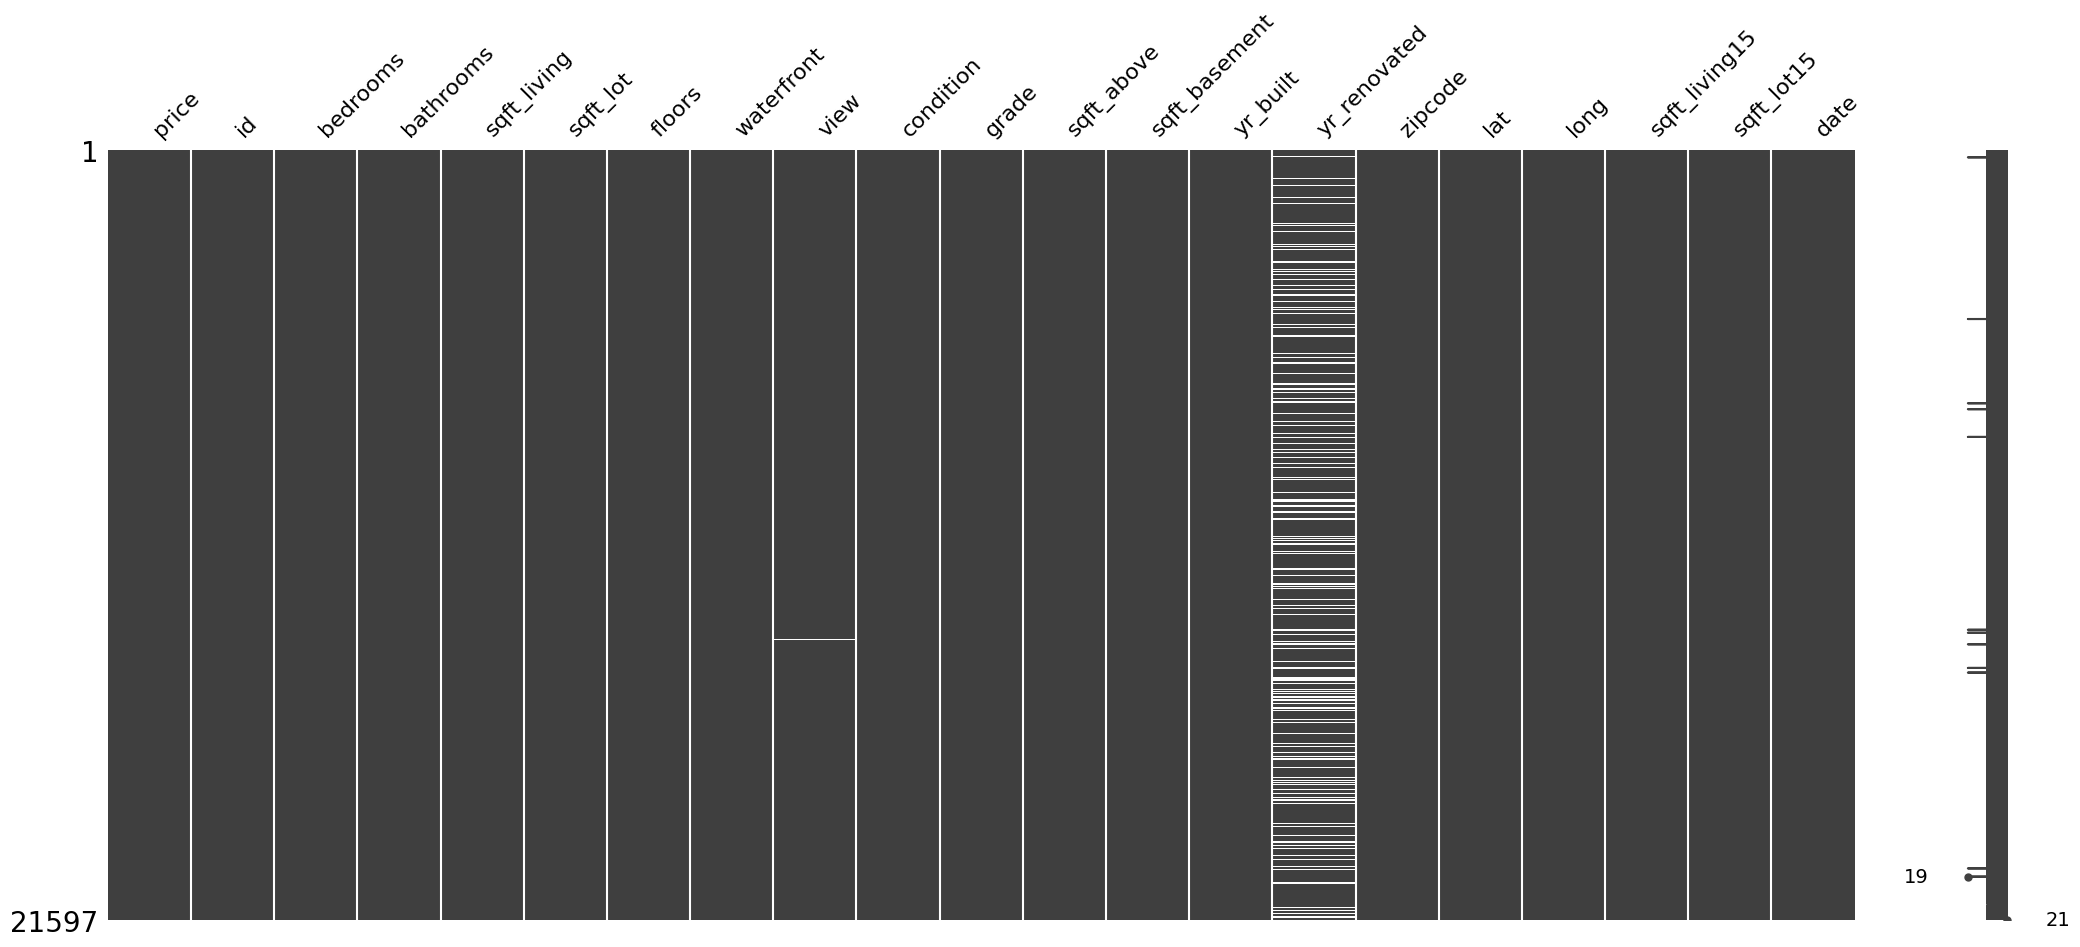

In [29]:
#df_houses_missing=df_houses.dropna()
msno.matrix(df_houses)

The waterfront column is now free of missing values, then it is possible to analysis the other column. Starting with view